# Machine learning lab

### Student id: \<02404395>
### Name: \<Stefanos Lucena>

## Outline and instructions

Complete the coding assignments below and answer all multiple choice questions in the notebook. Start writing your own code below the "**# YOUR CODE HERE**" comments for each assignment and **remove the "raise NotImplementedError()"**. Don't forget to reply to **the multiple choice questions in sections 3-4** and the **open-ended questions at the bottom**. 

Please do not use tools like Google colab, Visual studio code, Spyder, etc. Sometimes these tools will corrupt the notebook leading to a failure in the automatic grading system (and a 0 grade). You are free to use these tools while solving the assignment, but copy the answers to a fresh assignment notebook using jupyter notebook for submission to Ufora. 

The recommended Python version is **>= 3.9**. The recommended package versions are listed below:

- scikit-learn >= 1.0.0
- numpy >= 1.21.0
- pandas >= 1.4.0
- matplotlib >= 3.5.0


## Submission instructions:

1. Do not change function definitions or other code that is provided to you. Some cells of the notebook cannot be modified and will be clearly marked as such. Do not forget to execute these cells when scrolling past them.
2. Do not submit .zip files or other archives. Only submit the notebook, do not submit additional files such as data files which were provided to you.
3. Fill in your name and student id in the notebook in the top cell.

## Tips

- Provide enough comments in your code to describe your approach
- Restart the kernel and do a complete run before turning in (Kernel -> Restart & Run all).  The notebook should be able to run all cells top to bottom without showing any errors.
- **Make sure all cells were evaluated successfully!**

# Lab session on naive bayes

The problem we want to tackle for this session is **the analysis of video game product reviews**. The aim is to create a **Naive Bayes Classifier** that can predict whether a video game product review is positive or negative. This type of task is known as **sentiment analysis**.

Here are two word cloud plots for the 'most positive' and 'most negative' words in the reviews:

![Positive Words](OfficeData2024/pos_cloud.png) 
![Negative Words](OfficeData2024/neg_cloud.png)

## 1. The basics

### 1.1 Theoretics

We want a classifier that, when given a review of a video game product, can identify whether the given review belongs to a certain class $C$, where $C$ indicates whether the review is:
> $\mathbf{negative}$ (C = 0), $\mathbf{neutral}$ (C = 1)  or $\mathbf{positive}$ (C = 2).

For this lab, the **words occurring in a review are represented in a numerical way** so that it can be used as input for the classifier. We will do this by having $n$ variables $\mathbf{X} = (X_1, X_2, …, X_n)$ which represents whether **some pre-selected words** are present or not in the review. 

> For instance, if we pre-select the words _\['great', 'garbage', 'cool', 'amazing'\]_, we can expect a positive review to have an $\mathbf{X}$ of \['true', 'false', 'true', 'true'\], or in numerical format [1, 0, 1, 1]. This vector $\mathbf{X}$ now indicates that the words *great*, *cool*, and *amazing* are present in the review, while *garbage* is not. $\mathbf{X}$ can be used as input for the classifier.

Obviously the choice of these words is very important for the classifier. We can expect an $\mathbf{X}$ representing _\['a', 'the', 'and', 'be'\]_ to be of little help for the classification task. 

Notice that we are not analyzing the structure of a review, but simply treating it as a set of unordered and uncorrelated words. This is known as the **bag of words model** of documents.

Thus, if we know $P(C | \mathbf{X})$, when a new review is examined with $ (X_1, X_2, …, X_n) $ $= (x_1, x_2, …, x_n)$, we can choose:

\begin{align*}
C = C_i,& \text{ if } P(C = C_i~  | ~(x_1, x_2, …, x_n)) > P(C = C_j ~|~(x_1, x_2, …, x_n))  \\
\forall~j \neq i
\end{align*}

The problem is thus to calculate the posterior $P(C~  | ~(x_1, x_2, …, x_n)) = P(C~|~\mathbf{x})$. Using Bayes' rule, it can be written as

\begin{equation*}
P(C~| ~\mathbf{x}) = \frac{P(C) ~ p(\mathbf{x}~| ~C)}{p(\mathbf{x})}
\end{equation*}
or
\begin{align*}
	posterior &= \frac{prior \cdot likelihood}{evidence} 
\end{align*}

This formula contains three probabilities: 
1. the prior probability
2. the class likelihood
3. the evidence. 

Next paragraphs will explain each of these terms.

***
#### Prior probability
> _The probability $P(C = C_i)$ is the prior probability that the class C takes the value $C_i$._ 

It is the proportion of reviews with label $C_i$ in the available training set. 

It is called the **prior** probability because it is the knowledge we have _before_ looking at the observables  $\mathbf{x_i}$. 

> **The following property holds:**

 \begin{equation*}
 \sum_i P(C=C_i) = 1
 \end{equation*}
***
#### Class likelihood
> _$p(\mathbf{x}~| ~C)$ is the class likelihood and is the conditional probability that a review belonging to class C has the associated observation values $\mathbf{x}$._

So, if in our example:
> $\mathbf{X} = [x_1, x_2] $ = ['fun','worst']

then $p( [x_1 = 1, x_2 = 0]~| ~C = 2)$ is the probability that a positive review contains the word 'fun' and does not contain the word 'worst'.

The Naive Bayes model assumes *conditional independence between each random variable $x_i$*. This means we assume that the presence of one word in a review has no effect on the probability of a different word being in the same review (hence, the _naive_ part of the name). 

> **With this assumption the class likelihood can be written as:**

\begin{equation*}
p(\mathbf{x}~| ~C) = \sideset{}{_{i=1}^n}\prod p(x_i ~| ~C) 
\end{equation*}
***
#### Evidence

> _$p(\mathbf{x})$, the evidence, is the marginal probability that an observation $\mathbf{x}$ is seen, regardless of the class._

\begin{equation*}
p(\mathbf{x}) = \sum_i p(\mathbf{x}~| ~C = C_i) ~P(C = C_i) 
\end{equation*}

> **Assuming the conditional independence between each random variable $X_i$, the evidence is:**

\begin{equation*}
p(\mathbf{x}) = \sum_i \prod_j p(x_j ~| ~C = C_i) ~P(C = C_i)
\end{equation*}
***
#### The Naive Bayes classifier

Using the Bayes' rule, we can calculate the **posterior $P(C~| ~\mathbf{x})$**. 


\begin{align*}
	P(~C ~| ~x) &= \frac{P(~x | ~C) \cdot P(C)}{P(x)} 
\end{align*}

> **The Naive Bayes classifier chooses the class $\hat{C}$ as the class with the highest probability (maximum a posteriori or MAP decision rule):**

\begin{equation*}
\hat{C} = arg\max_{i}~P(C_i | ~\mathbf{x}) 
\end{equation*}

***

#### The calculation

In this session, you will learn:
1. How to calculate the prior probability and the class likelihood from the training data
2. How to build a Naive Bayes classifier.

### 1.2 Loading the data

In [1]:
############################# READ ONLY #############################
import pandas as pd
import numpy as np
np.random.seed(2024)

The review data is loaded from .csv files, and is pre-processed to make the data suitable for working with. A train set is used for _learning_ the model, while a seperate test set is used for _evaluating_ the model. Each review is represented as a list of tokens (words), while the accompanying labels indicate the sentiment of the review. More specifically:

The variables *train\_reviews* and *test\_reviews* contain reviews, where each review is represented as a bag of words. The structures of these variables are therefore arrays containing arrays of strings.
The data sizes are the following:
- The array *train\_reviews* contains $1050$ reviews (the elements are arrays with a variable amount of strings) 
- The array *test\_reviews* contains $1050$ reviews (the elements are arrays with a variable amount of strings) 


The variables *train\_labels* and *test\_labels* are arrays which hold the labels (integers) corresponding to each review. To determine the label, the "rating" of the provided dataset is mapped as follows:
- 0 means a negative review, the reviewer gave a rating of 1 star.
- 1 means a neutral review, the reviewer gave a rating of 3 stars.
- 2 means a positive review, the reviewer gave a rating of 5 stars.

For reference, the full raw data is available at [http://jmcauley.ucsd.edu/data/amazon/](http://jmcauley.ucsd.edu/data/amazon/)

In [2]:
############################# READ ONLY #############################
train_data = pd.read_csv('OfficeData2024/train_reviews.csv', sep=',', usecols=range(2))
train_labels = np.array([0 if x==1 else 1 if x==3 else 2 for x in train_data.label])
train_labels = train_labels.reshape(-1,1)

train_reviews = train_data.review.values
train_reviews = np.array([np.array(x.split()) for x in train_reviews], dtype='object')

test_data = pd.read_csv('OfficeData2024/test_reviews.csv', sep=',', usecols=range(2))
test_labels = np.array([0 if x==1 else 1 if x==3 else 2 for x in test_data.label])
test_labels = test_labels.reshape(-1,1)

test_reviews = test_data.review.values
test_reviews = np.array([np.array(x.split()) for x in test_reviews], dtype='object')

print('Train set consists of: {} reviews'.format(train_reviews.shape[0]))
print('Test set consists of:  {} reviews'.format(test_reviews.shape[0]))

Train set consists of: 2160 reviews
Test set consists of:  2160 reviews


In [3]:
review_index = 0

print('review example:\n')
print(train_reviews[review_index])

print('\n\nreview class:\n')
print(train_labels[review_index])

review example:

['flimsy' 'dont' 'waste' 'your' 'money']


review class:

[0]


### 1.3 Calculating the prior probabilities

The first probabilty that needs to be calculated is the prior probability over C. 

\begin{equation*}
	P(C = C_i) = \frac{\#D\{C = C_i \} }{\#D}
\end{equation*}

where:
* $C_i \in \{0,1,2\}$
* $\#D\{constraint \}$ is the number of examples in the training set that satisfy the constraint in the brackets
* $\#D$ is the total number of examples in the training set.

Implement this in the function **compute_priors(train_labels)** that takes as input:
* $labels$, the train labels

and returns a tuple with the prior for each $C_i \in \{0,1,2\}$.


In [4]:
def compute_priors(train_labels):

    priors = [] # fill this with the prior for class 0,1 and 2 - in this order
    
    # YOUR CODE HERE

    #Counters Start
    D_0 = 0
    D_1 = 0
    D_2 = 0

    #Priors calcultating
    for i in train_labels:

        if i == 0:
            D_0 += 1
        elif i==1:
            D_1 += 1
        else:
            D_2 += 1

    D = train_reviews.shape[0]

    prior_D_0 = D_0 / D

    prior_D_1 = D_1 / D

    prior_D_2 = D_2 / D

    priors.append(prior_D_0)
    priors.append(prior_D_1)
    priors.append(prior_D_2)
    
    return priors

In [5]:
############################# READ ONLY #############################
prob_neg, prob_neut, prob_pos = compute_priors(train_labels) # compute the prior probabilities that a review has 1,3, or 5 stars
print('P(C = 0) = {} \nP(C = 1) = {} \nP(C = 2) = {}'.format(prob_neg,prob_neut,prob_pos))


P(C = 0) = 0.45 
P(C = 1) = 0.275 
P(C = 2) = 0.275


If there is an equal number of positive, neutral and negative reviews in the training data, then there is a uniform distribution between the classes. If there is a different number of positive and negative reviews in the training data, then there is a non-uniform distribution between the classes. Think about a real-world example for both cases.

> It is important to realise that non-uniform distributions are common, and as such the prior probability can be different from $ \frac{1}{\# classes} $. The prior probability should always be learned from the *training data*.

### 1.4 Calculating the class likelihood

The second set of probabilities that should be calculated is the set of class likelihoods.

\begin{equation*}
p(\mathbf{x}~| ~C) = \sideset{}{_{i=1}^n}\prod p(x_i ~| ~C) 
\end{equation*}


In the probability $ p(x_i ~| ~C) $, $C$ can take the values $0$, $1$ or $2$ representing the negative, neutral and positive reviews, and the observed value $x_i$ of a word $X_i$ can take the values $0$ and $1$ representing the fact that word $X_i$ is present or not. This leaves 2 probabilities for one word $X_i$ per class $C$, which over three classes results in 6 probabilities to be calculated. However, we know that:

\begin{align*}
	p(x_i = 1 ~| ~C) &=  1 - p(x_i = 0  ~| ~C) 
\end{align*}

So the probability that the word $X_i$ _is present_ in a negative review can be calculated from the fact that the word $X_i$ _is not present_ in the negative review, as such, once one of the two word probabilities for a class is calculated, the other can easily be obtained.

The probability $p(x_i = 1 ~| ~C = C_j)$ can be estimated from the training data as follows:

\begin{equation*}
	\hat{p}(x_i = 1 ~| ~C = C_j) = \frac{\#D\{ \text{word } x_i \text{ present} \wedge C = C_j\} }{\#D\{C = C_j\}}
\end{equation*}



In this exercise we will use a **wordset** of 30 words extracted from the most occurring ones throughout the data. 

> Fill in the function **compute_likelihood** that takes as input:
>    - the wordset (array of strings)
>    - the reviews in the training set (array of arrays containing strings)
>    - the labels of the reviews in the training set (array of integers)

The function should return a matrix $\mathbf{L}^{W~\times~|C|}$ with W=size of wordset and |C|=number of classes, such that:

\begin{equation*}
\mathbf{L_{i,j}} = P(x_i | C_j) 
\end{equation*}

for all words $\mathbf{x_i}$ in the wordset and all classes $C_j$.


> Note that it is important that these probabilities are **calculated on the train set**.

In [6]:
############################# READ ONLY #############################
wordset = [
    "great",
    "good",
    "work",
    "quality",
    "product",
    "paper",
    "dont",
    "well",
    "love",
    "like",
    "price",
    "nice",
    "works",
    "didnt",
    "gift",
    "cheap",
    "pens",
    "would",
    "little",
    "perfect",
    "thin",
    "received",
    "made",
    "item",
    "returned",
    "doesnt",
    "small",
    "time",
    "really",
    "used"
]

In [7]:
def compute_likelihood(wordset, reviews, labels):
    """
    wordset: list of words to compute the likelihood for
    reviews: array of reviews (training set)
    labels: array of labels (training set)
    
    returns: 2D numpy array, W x |C|. Containing the probability for each
    of the words that the review is:
        C=0, a negative 1 star review (first column),
        C=1, a neutral  3 star review (second column),
        C=2, a positive 5 star review (third column)
    """
    
    likelihood = np.zeros((len(wordset),len(np.unique(labels))))
    
    # YOUR CODE HERE

    # Counters start
    D_likelihood_numerator_0 = np.zeros(len(wordset))
    D_likelihood_numerator_1 = np.zeros(len(wordset))
    D_likelihood_numerator_2 = np.zeros(len(wordset))
    D_likelihood_denominator_0 = 0
    D_likelihood_denominator_1 = 0
    D_likelihood_denominator_2 = 0

    # Iterate through reviews
    for i in range(len(reviews)):
        review = reviews[i]
        label = labels[i]

        # Verify if each word of wordset is present in review
        for word in review:
            if word in wordset:
                word_index = wordset.index(word)
                
                if label == 0:
                    D_likelihood_denominator_0 += 1
                    D_likelihood_numerator_0[word_index] += 1
                elif label == 1:
                    D_likelihood_denominator_1 += 1
                    D_likelihood_numerator_1[word_index] += 1
                else:
                    D_likelihood_denominator_2 += 1
                    D_likelihood_numerator_2[word_index] += 1

    # Calculate probabilities for each class
    for word_index in range(len(wordset)):
        likelihood[word_index, 0] = D_likelihood_numerator_0[word_index] / D_likelihood_denominator_0 if D_likelihood_denominator_0 > 0 else 0
        likelihood[word_index, 1] = D_likelihood_numerator_1[word_index] / D_likelihood_denominator_1 if D_likelihood_denominator_1 > 0 else 0
        likelihood[word_index, 2] = D_likelihood_numerator_2[word_index] / D_likelihood_denominator_2 if D_likelihood_denominator_2 > 0 else 0

    return likelihood

The class likelihoods of the words being present in a negative or positive review are: 
    negative   neutral  positive     words
0   0.017060  0.037891  0.206745     great
1   0.049869  0.105437  0.086510      good
2   0.095801  0.051071  0.021994      work
3   0.049869  0.037891  0.060117   quality
4   0.059055  0.028007  0.039589   product
5   0.052493  0.070840  0.004399     paper
6   0.076115  0.029654  0.011730      dont
7   0.027559  0.057661  0.035191      well
8   0.003937  0.006590  0.104106      love
9   0.045932  0.049423  0.019062      like
10  0.014436  0.072488  0.033724     price
11  0.006562  0.032949  0.070381      nice
12  0.011811  0.070840  0.016129     works
13  0.057743  0.024712  0.002933     didnt
14  0.002625  0.001647  0.083578      gift
15  0.044619  0.029654  0.002933     cheap
16  0.032808  0.037891  0.005865      pens
17  0.030184  0.032949  0.013196     would
18  0.007874  0.042834  0.027859    little
19  0.005249  0.004942  0.057185   perfect
20  0.028

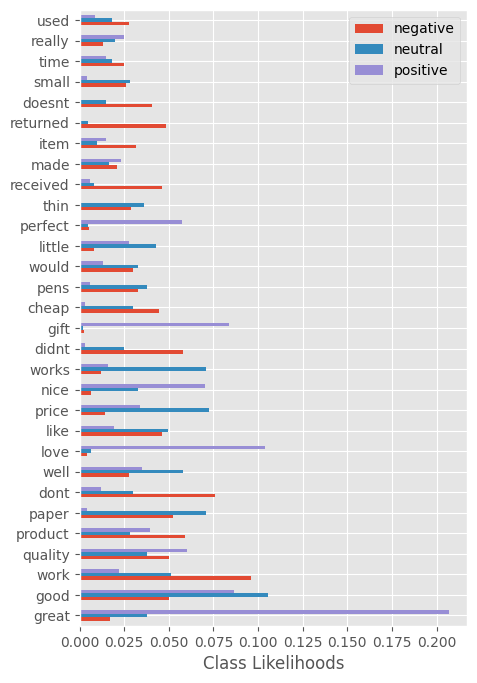

In [8]:
############################# READ ONLY #############################
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

likelihood_matrix =  compute_likelihood(wordset, train_reviews, train_labels)

df_likelihood = pd.DataFrame(likelihood_matrix.copy(), columns=['negative', 'neutral', 'positive'])
df_likelihood['words'] = wordset

print("The class likelihoods of the words being present in a negative or positive review are: ")
print(df_likelihood)

df_likelihood[['negative', 'neutral', 'positive']].plot.barh(figsize=(5,8))
plt.yticks(range(len(df_likelihood)), df_likelihood.words.values)
plt.xlabel('Class Likelihoods')
plt.show()

## 2. The Naive Bayes Classifier

Now that you calculated the prior probabilities and the likelihood matrix, you have everything to create a Naive Bayes classifier, as there is no need for the evidence in our Naive Bayes Classifier. Please reason about why this is, as it is important to understand.

\begin{align*}
	P(~C ~| ~x) &= \frac{P(~x | ~C) \cdot P(C)}{P(x)} 
\end{align*}
or
\begin{align*}
	posterior &= \frac{likelihood \cdot prior}{evidence} 
\end{align*}

To summarize, to predict the class $\hat{C}$ for a review $\mathbf{x}$ using the Naive Bayes Classifier:
1. calculate the $P(C = C_j~|~\mathbf{x})$ for each $C_j$ using the previously implemented functions and the provided wordset
2. choose the class with the **highest probability** as the guessed label $\hat{C}$ (in case of a tie, return the smallest label)

> Implement the function **naive_bayes** to classify both train and test set, using the words in the wordset (using variable `wordset`) and the previously impemented method to compute the class likelihood matrix $\mathbf{L}$. The output of **naive_bayes** should be an array where each element is a prediction for the corresponding review. Remember that the prediction should be an integer $\in [0,1,2]$

In [9]:
def naive_bayes(reviews, likelihood_matrix, wordset, priors):
    """
    reviews: array of reviews
    likelihood_matrix: 2D numpy array, W x |C|
    wordset: list of words in the wordset
    
    returns: sentiment prediction for reviews. Should be 2D numpy arra  y with shape (number of items in testset, 1) where 
             each element is either 0, 1 or 2 (negative/neutral/positive respectively).
    """
    predictions = np.zeros((len(reviews),1))
    p_neg, p_neut, p_pos = priors

    # YOUR CODE HERE

    smoothing=1e-9

    #Iterate over each review
    for i in range(len(reviews)):
        review = reviews[i]

        # Initialize posterior probabilities with the log of the priors
        posterior_0 = np.log(p_neg)  # For class 0 (negative)
        posterior_1 = np.log(p_neut)  # For class 1 (neutral)
        posterior_2 = np.log(p_pos)  # For class 2 (positive)

        # Verify if each word of wordset is present in review
        for word in review:
            if word in wordset:
                word_index = wordset.index(word)

                # Use smoothing to avoid log(0)
                likelihood_0 = likelihood_matrix[word_index, 0] + smoothing
                likelihood_1 = likelihood_matrix[word_index, 1] + smoothing
                likelihood_2 = likelihood_matrix[word_index, 2] + smoothing

                # Update posterior probabilities with smoothed likelihoods
                posterior_0 += np.log(likelihood_0)
                posterior_1 += np.log(likelihood_1)
                posterior_2 += np.log(likelihood_2)



        # Store the posterior probabilities in a list
        probabilities = [posterior_0, posterior_1, posterior_2]

        # Find the index (class) with the maximum probability
        # In case of a tie, max() will return the first occurrence, which ensures the smallest class is chosen
        predictions[i] = probabilities.index(max(probabilities))

    return predictions

In [10]:
############################# READ ONLY #############################
priors = compute_priors(train_labels)

# predictions on the train set
y_pred_train = naive_bayes(train_reviews, likelihood_matrix, wordset, priors)

# predictions on the test set
y_pred_test = naive_bayes(test_reviews, likelihood_matrix, wordset, priors)


> Also implement the function **compute_accuracy** that takes as input the predicted classes for the reviews  (*predictions*) and the real classes for the reviews  (*labels*) and returns the accuracy score for the classification task.

In [11]:
def compute_accuracy(predictions, labels):
    assert np.all(predictions.shape == labels.shape)
    
    # YOUR CODE HERE

    # Compare predictions with the true labels, correct_predictions is a boolean array
    correct_predictions = predictions == labels

    # Accuracy Calculating 
    accuracy = np.sum(correct_predictions) / len(labels)

    
    return accuracy

In [12]:
############################# READ ONLY #############################
# accuracy on the train set
accuracy_train = compute_accuracy(y_pred_train, train_labels)

# accuracy on the test set
accuracy_test = compute_accuracy(y_pred_test, test_labels)

print(f'ACCURACY TRAIN SET: {accuracy_train*100} %')
print(f'ACCURACY TEST SET:  {accuracy_test*100} %')


ACCURACY TRAIN SET: 62.31481481481481 %
ACCURACY TEST SET:  61.01851851851852 %


The accuracy metric alone is often not sufficient to evaluate a model's performance. For this reason, precision, recall and F1 are also reported. The meaning of each of these metrics is as follows:

- Precision: The ratio of true positive predictions to the total number of positive predictions made. It measures how many of the items identified as positive are actually positive.
- Recall: The ratio of true positive predictions to the total number of actual positives. It measures how many of the actual positive cases were identified correctly.
- F1 Score: The harmonic mean of precision and recall, offering a balance between the two metrics. It is particularly useful when the class distribution is imbalanced.

***

Remember that:

> Precision = $\frac{TP}{TP+FP}$

> Recall = $\frac{TP}{TP+FN}$

> F1 = $2 \cdot \frac{precision \cdot recall}{precision+recall}$

***

**Implement the function below to compute precision, recall and F1 score for a specific class.**

In [13]:
def compute_precision_recall_F1(predictions, labels, c):
    precision,recall, f1_score = 0,0,0
    
    # YOUR CODE HERE

    #Precision Calculating

    #TP
    tp = (predictions == c) & (labels == c)
    TP = np.sum(tp)

    #FP
    fp = (predictions == c) & (labels != c)
    FP = np.sum(fp)
    
    if (TP + FP) > 0:
        precision = TP / (TP + FP)
    else:
        precision = 0

    #Recall Calculating

    #FN
    fn = (predictions != c) & (labels == c)
    FN = np.sum(fn)

    if (TP + FN) > 0:
        recall = TP / (TP + FN)
    else:
        recall = 0

    #F1 Calculating
    if (precision + recall) > 0:
        f1_score = 2* (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    
    return precision, recall, f1_score

The precision, recall and F1-score are calculated per class. In a multi-class or multi-label classification problem, you can compute these metrics for each class separately and then average them. When treating all classes equally, irrespective of their frequency (the imbalance) in the dataset, this is called *Macro-averaging*. *Micro-averaging* would be to average weighted by the number of true instances for each label.

***

Remember that:

> macroF1 = $\frac{\sum_j F1_j}{|C|}, \forall ~\text{class}~ j \in \{1,\dots,|C|\} $ 

***

In [14]:
############################# READ ONLY #############################
print("--- TEST SET ---")
macro_f1 = 0 
for c in [0,1,2]:      
    P, R, F1 = compute_precision_recall_F1(y_pred_test, test_labels, c)
        
    macro_f1 += F1

    print('Precision for class {}: {}'.format(c,P))
    print('Recall for class    {}: {}'.format(c,R))
    print('F1 for class        {}: {}'.format(c,F1))
    print('---')
        
macro_f1 /= 3.
print('Macro F1             : {}'.format(macro_f1))


--- TEST SET ---
Precision for class 0: 0.5818656229615133
Recall for class    0: 0.9176954732510288
F1 for class        0: 0.7121756487025948
---
Precision for class 1: 0.5394736842105263
Recall for class    1: 0.20707070707070707
F1 for class        1: 0.2992700729927007
---
Precision for class 2: 0.7593984962406015
Recall for class    2: 0.51010101010101
F1 for class        2: 0.6102719033232629
---
Macro F1             : 0.5405725416728527


> Notice that the F1 score is high for class 0 but lower for the minority classses, as we would expect given the class imbalance (significanlty lower for class 1, slightly lower for class 2). This impacts the overall macro F1 score.

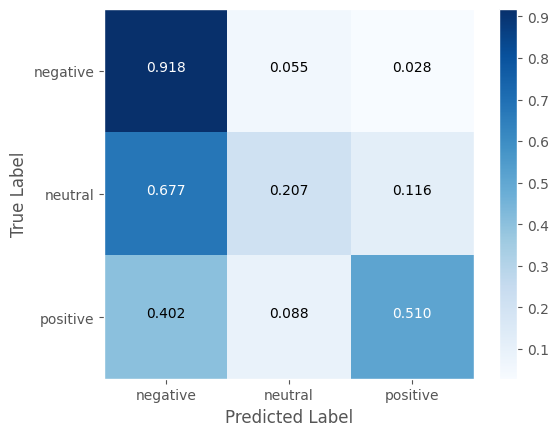

In [15]:
############################# READ ONLY #############################
def plot_confusion_matrix(predictions, labels):
    plt.figure()
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_pred=predictions, y_true=labels)
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.grid(False)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.yticks((0,1,2),('negative','neutral','positive'))
    plt.xticks((0,1,2),('negative','neutral','positive'))
    
    fmt = '.3f'
    thresh = cm.max() / 2.
    import itertools
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.colorbar()
    
plot_confusion_matrix(y_pred_test, test_labels)

## 3. Using a balanced dataset

One possible way to handle the data imbalance is by resampling our training data as to balance the data such that the distribution of the classes is uniform.

> Generally, there are two options for this:
>   - Upsampling the minority class(es) (e.g. generating new samples using data augmentation)
>   - Subsampling the majority class

Since it can be quite tricky to generate new (artificial) reviews, we will try to improve our model by subsampling the negative reviews in our training data.
***
For simplicity, we will subsample the majority class by retaining the **FIRST** *N* reviews, where *N* is the number of training samples in the minority class. Complete the code for **subsample** function to return:
1. a subsampled dataset (an array of reviews). The subsampled set will have the following order of indexes for the first dimension:
   1.  0 -->  N-1: negative reviews
   2.  N --> 2N-1: neutral reviews
   3. 2N --> 3N-1: positive reviews
2. the corresponding labels for this new subsampled dataset (an array of integers)

> ## IMPORTANT.
> **Do not shuffle the data or change the order of the rows, as doing so will affect your model and thus your scores.**

In [16]:
def subsample(data, labels):
    subsampled_data = None
    subsampled_labels = None
    
    # YOUR CODE HERE
    
    #Search for the lower N into C=1 and C=2
    N_1 = np.sum(labels==1)
    N_2 = np.sum(labels==2)

    N = min(N_1, N_2)

    # Step 3: Subsample the negative class (class 0)
    negative_indices = np.where(labels == 0)[0][:N]
    neutral_indices = np.where(labels == 1)[0]
    positive_indices = np.where(labels == 2)[0]

    # Step 4: Use the indices to get the corresponding data and labels
    subsampled_data = np.concatenate([data[negative_indices], data[neutral_indices], data[positive_indices]])
    subsampled_labels = np.concatenate([labels[negative_indices], labels[neutral_indices], labels[positive_indices]])

    return subsampled_data, subsampled_labels

> After implemeting the *subsample* function, run the cell below. Note that your new training dataset should contain 882 reviews, and the distributions of labels should now be uniform.

In [17]:
############################# READ ONLY #############################
subsampled_data, subsampled_labels = subsample(train_reviews, train_labels)
print(f'Balanced dataset size: {subsampled_data.shape}')
priors = compute_priors(subsampled_labels)
print(f'New priors: {priors}')


Balanced dataset size: (1782,)
New priors: [0.275, 0.275, 0.275]


> Now train a Naive Bayes Classifier on this new dataset.
>    - Remember to also recompute the likelihood matrix. 
>    - After training, compute the new accuracy and F1 scores.
> (note that the new priors already were calculated in the cell above).

In [18]:
likelihood_matrix_balanced = None # the recomputed likelihood matrix
y_pred_test = None # the predictions on the test set

accuracy = 0     # accuracy on the test set
f1_score_0 = 0   # f1 score for class 0 on the test set
f1_score_1 = 0   # f1 score for class 1 on the test set
f1_score_2 = 0   # f1 score for class 1 on the test set
macro_f1 = None  # macro f1 score on the test set

# YOUR CODE HERE

#likelihood matrix using the balanced dataset
likelihood_matrix_balanced = compute_likelihood(wordset, subsampled_data, subsampled_labels)

#Naive Bayes classifier
y_pred_test = naive_bayes(test_reviews, likelihood_matrix_balanced, wordset, priors)

#Accuracy on the test set
accuracy = compute_accuracy(y_pred_test, test_labels)

#F1 score for each class
precision_0, recall_0, f1_score_0 = compute_precision_recall_F1(y_pred_test, test_labels, 0)
precision_1, recall_1, f1_score_1 = compute_precision_recall_F1(y_pred_test, test_labels, 1)
precision_2, recall_2, f1_score_2 = compute_precision_recall_F1(y_pred_test, test_labels, 2)

#Macro F1 score
macro_f1 = (f1_score_0 + f1_score_1 + f1_score_2) / 3

In [19]:
############################# READ ONLY #############################
print('### PERFORMANCE USING BALANCED TRAINING SET ###')
print(f'Accuracy:      {accuracy*100} %')
print(f'F1 on class 0: {f1_score_0}')
print(f'F1 on class 1: {f1_score_1}')
print(f'F1 on class 2: {f1_score_2}')
print(f'Macro F1:      {macro_f1}')


### PERFORMANCE USING BALANCED TRAINING SET ###
Accuracy:      60.0462962962963 %
F1 on class 0: 0.6927038626609442
F1 on class 1: 0.3619047619047619
F1 on class 2: 0.6105263157894738
Macro F1:      0.5550449801183933


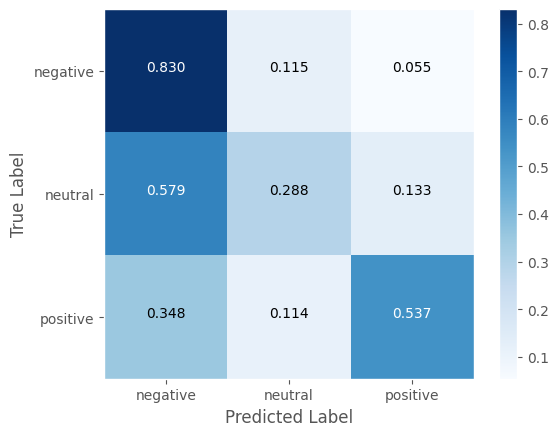

In [20]:
plot_confusion_matrix(y_pred_test, test_labels)

### Multiple Choice Question

How does the rebalancing affect the performance? Answer all that apply.

a) To compare models fitted on different sets of data with different priors, the F1 score is the preferred metric. To compare models all fitted on the same set of data, the accuracy is the most suitable metric.  
b) The best performing positive-to-negative ratio is application-dependent and not always uniform.  
c) With a large enough dataset, subsampling the majority class should be preferred to upsampling the minority class.  

In [21]:
# e.g. use the following syntax answer_question = 'ac'  answer_question = 'd'  answer_question = 'abc', etc.
answer_question_1 = 'abc'
# YOUR CODE HERE

In [22]:
############################# READ ONLY #############################

## 4. Using a larger wordset

So far, we have been using a  small subset of words.
***
However, the wordset is crucial for the performance of the model, therefore we will now try to reduce the error rate by adding more words. 

> To do this we'll use the **wordset.csv** set, which is loaded in using the following cell. It contains a set of unique words from the most occuring words in all of the reviews. Common 'stop words' are excluded. 

Since we will use the full (unbalanced) dataset again, we will have to recompute the priors and likelihood again. 

> Computing the class likelihood matrix does become quite intensive when using a big wordset due to a lot of text search. We therefore provide you a precomputed matrix which you can use instead. This likelihood matrix is loaded into the variable `full_likelihood` by executing the second cell.

In [23]:
############################# READ ONLY #############################
priors = compute_priors(train_labels)
wordset_big = pd.read_csv('OfficeData2024/wordset_big.csv', sep=',', header=None).iloc[:,0]

print('Total words in wordset: {}'.format(len(wordset_big)))
print('Sample words: {}'.format(np.random.choice(wordset_big,5)))

Total words in wordset: 200
Sample words: ['high' 'heavy' 'year' 'time' 'fine']


In [24]:
############################# READ ONLY #############################
import pickle
with open("OfficeData2024/likelihood_big_mat.obj", "rb") as file: 
    full_likelihood = pickle.load(file)
print(f'Full likelihood shape: {full_likelihood.shape}')

Full likelihood shape: (200, 3)


> Using the new wordset and likelihood, calculate:
>   1. The accuracy
>   2. The macro F1 score

In [25]:
y_pred_test = None # the predictions on the test set
accuracy = 0
macro_f1 = 0

# YOUR CODE HERE
#Predictions on the test set
y_pred_test = naive_bayes(test_reviews, full_likelihood, wordset_big, priors)

#Calculate accuracy
accuracy = compute_accuracy(y_pred_test, test_labels)

#Calculate F1 for each class
precision_0, recall_0, f1_score_0 = compute_precision_recall_F1(y_pred_test, test_labels, 0)
precision_1, recall_1, f1_score_1 = compute_precision_recall_F1(y_pred_test, test_labels, 1)
precision_2, recall_2, f1_score_2 = compute_precision_recall_F1(y_pred_test, test_labels, 2)

#Calculate Macro F1
macro_f1 = (f1_score_0 + f1_score_1 + f1_score_2) / 3

In [26]:
############################# READ ONLY #############################
print(f'Accuracy:        {accuracy*100} %')
print(f'Macro F1:        {macro_f1}')

Accuracy:        45.0 %
Macro F1:        0.20689655172413793


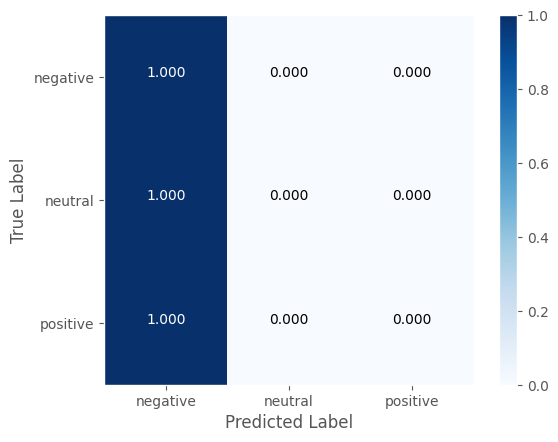

In [27]:
plot_confusion_matrix(y_pred_test, test_labels)

> As you can observe, the size and choice of the wordset is an important factor for the performance of a Naive Bayes algorithm. In our example, using 200 words instead of 30, already improved the macro F1 score significantly.

###  Multiple Choice Question

Based on the classification rules discussed and implemented, which of the following are true? Mark all that apply.

a) Combining both balancing the dataset and using a bigger wordset will always lead to a better performance than when using only one of the approaches. 

b) Common words, such as *the* or *you* will be associated with high class-likelihoods, e.g. $P(~\text{'the'}~|~C) \approx ~1$.

c) $P(~C=2 ~| ~X_j) = 0, ~\forall ~X_j \in \{~X ~| ~\text{'exciting'} \in ~X\}$ if *'exciting'* is in the wordset but never occurs in any positive review in the training set.

In [28]:
# e.g. use the following syntax answer_question = 'ac'  answer_question = 'd'  answer_question = 'abc', etc.
answer_question_2 = 'c'

In [29]:
############################# READ ONLY #############################

# Open-ended questions

## Question 1
When setting up the Naive Bayes classifier, no function was implemented to calculate the evidence, yet the classifier could still be used without the evidence term to obtain the required predictions. Please explain shortly why the evidence term can be safely omitted for the given task. Also explain in which case the evidence would be needed. (max. 10 lines)

YOUR ANSWER HERE

In this case, we could skip the evidence calculation because the evidence term is the same for all classes. Moreover, for the purpose of Naive Bayes, which is to find the class that maximizes P(C|x), the evidence does not make a difference. However, calculating the evidence becomes important in cases where the exact probability is crucial, such as in medical diagnoses.

## Question 2

As can be learned from the plotted confusion matrices, balancing the training data by subsampling the majority class did help to improve the F1 scores on the minority classes and, consequently, also the overall macro F1 score. It did however also have a negative influence on the F1 score for the majority class. Please explain why this happens. (max. 10 lines)

YOUR ANSWER HERE

We can explain the positive impact on the minority classes by subsampling the majority class, as reducing the number of majority class reviews helps the minority classes become more weighted. As a result, the macro F1 score improves, since the F1 score for the minority classes increases. However, the F1 score for the majority class decreases due to the reduction in reviews, leading to less data for the model to learn from. This reduction in data can cause the classifier to generalize poorly for the majority class, especially if the reduction is significant.

Therefore, we have a trade-off: increasing the performance for the minority classes while decreasing it for the majority class. This trade-off is common in imbalanced datasets and needs to be managed carefully, depending on the application. If the minority classes are more critical for the problem at hand (such as detecting rare but important events), this trade-off may be acceptable or even desired. On the other hand, if the majority class is more important, subsampling might not be the best approach. Ultimately, choosing the best option depends on how important each class is in the specific context, and what level of balance is required between sensitivity to minority classes and accuracy for the majority class.

## Question 3

An improvement in classification performance could be noted when increasing the size of the wordset from 30 words to 200 words. Explain what can be expected when using a wordset containing all words occuring in the data set. Also explain why this happens. (max. 10 lines)

YOUR ANSWER HERE

Increasing the wordset improves the model performance because more relevant information can be captured. However, including the entire dataset as the wordset could cause problems due to the increased noise from irrelevant terms, such as stop words. Additionally, this could lead to overfitting, where the model adapts excessively to the training data, making it difficult to generalize well to new data during testing. As the wordset grows, the model may also require more computational resources, which can slow down training and prediction times. Therefore, it's important to carefully select a balanced wordset that maximizes relevant features while minimizing noise.
Moreover, adding too many words can dilute the impact of truly important features, making it harder for the model to distinguish between classes. Hence, a thoughtful balance between wordset size and quality is crucial for optimal performance.